## Домашнее задание №2
# Багиров Фарид


* Равномерное распределение

$\frac1n\sum X_i^k=E_\theta X^k = \frac1\theta\int\limits_0^\theta x^k dx = \frac{\theta^k}{k+1}$

Откуда получаем оценку $\theta = \left(\frac{k+1}{n}\sum X_i^k\right)^{\frac 1k}$.

Теперь остается только все посчитать.

In [28]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [46]:
#массив k
ks = np.arange(1,300, 3)

In [47]:
def mle_uniform(n, k, uni):
    """
    params:
        n - размер выборки
        k - степень для метода моментов
        uni - генератор распределения
    returns:
        teta - оценка парметра равномерного распределения, посчитанная методом моментов
    """
    x = uni(n)
    teta = sum(x**k)/n*(k+1)
    teta = teta**(1/k)
    return teta

In [48]:
#генерация равномерного распределения
def uniform(theta):
    def unif(size):
        return np.random.uniform(0, theta, size)
    return unif

In [122]:
#построение графика
def uniplot(theta, n, ne):
    """
    Строит график для массива ks среднего квадратичного отклонения для 
    равномерного распределения с параметром theta.
    params:
        theta - параметр равномерного распределения
        n - размер выборки, по которым считается оценка параметра
        ne - число выборок, которые исследуются
    """
    u = uniform(theta)
    ers = np.zeros(len(ks))
    for i in range(ne):
        for i, k in enumerate(ks):
            ers[i] += ((mle_uniform(n, k, u) - theta)**2) / ne
    plt.plot(ks, ers)
    plt.yscale("log")
    plt.xlabel("k")
    plt.ylabel(r"$\log~$RMS")

Ниже строятся графики зависимости среднего квадратичного отклонения от $k$. Графики интерактивные, параметры можно менять (как минимум в jupyter точно можно). 

In [121]:
interact(uniplot, theta=(1, 10, 1), n=[10, 100, 1000], ne=[10, 100, 1000])

interactive(children=(IntSlider(value=5, description='theta', max=10, min=1), Dropdown(description='n', option…

<function __main__.uniplot(theta, n, ne, flag=False)>

Пример одного графика для $\theta = 6, n=1000, ne=1000$.

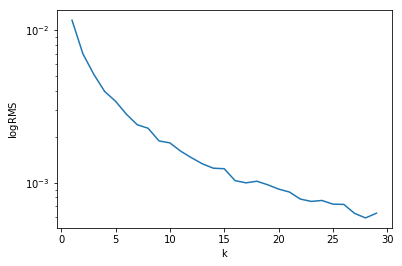

In [123]:
uniplot(6,1000,1000)

Вывод

Первое, что видно, что при увеличении $k$ погрешность уменьшается. Так же видно, что чем больше $\theta$, тем больше погрешность, как и должно быть, потому что весь масштаб увеличивается, а мы считаем абсолютную погрешность, которая зависит от масштаба. Теперь про размер выборки - чем больше, тем лучше и это и видно на графиках (на 10 какой-то сплошной шум, а на 1000 уже все хорошо уменьшается). Для $ne$ же, чем оно больше, тем более гладким выглядит график - на саму погрешность она не влияется.

* Экспоненциальное распределение

$\frac1n\sum X_i^k=E_\theta X^k = \theta\int\limits_0^\infty x^k e^{-\theta x} dx = \theta^{-k}\int\limits_0^\infty x^k e^{-x} dx=\theta^{-k} \Gamma(k+1) =\theta^{-k} k!$

Откуда получаем оценку $\theta = \left(\frac{1}{nk!}\sum X_i^k\right)^{-\frac 1k}$.

Теперь остается только все посчитать.

In [114]:
#массив k
km = 30
ks = np.arange(1,km, 1)
kf = np.ones(km)
for i in range(1, km):
    kf[i] = int((i+1)*kf[i-1])

In [108]:
def mle_exp(n, k, exp):
    """
    params:
        n - размер выборки
        k - степень для метода моментов
        exp - генератор распределения
    returns:
        teta - оценка парметра экспоненциального распределения, посчитанная методом моментов
    """
    x = exp(n)
    teta = sum(x**k)/n/kf[k-1]
    teta = teta**(-1/k)
    return teta

In [109]:
#генерация экспоненциального распределения
def expo(theta):
    def expf(size):
        return np.random.exponential(1/theta, size)
    return expf

In [117]:
#построение графика
def c:
    """
    Строит график для массива ks среднего квадратичного отклонения для 
    экспоненциального распределения с параметром theta.
    params:
        theta - параметр экспоненциального распределения
        n - размер выборки, по которым считается оценка параметра
        ne - число выборок, которые исследуются
    """
    e = expo(theta)
    ers = np.zeros(len(ks))
    for i in range(ne):
        for i, k in enumerate(ks):
            ers[i] += ((mle_exp(n, k, e) - theta)**2) / ne
    plt.plot(ks, ers)
    plt.yscale("log")
    plt.xlabel("k")
    plt.ylabel(r"$\log~$RMS")

Ниже строятся графики зависимости среднего квадратичного отклонения от $k$. Графики интерактивные, параметры можно менять (как минимум в jupyter точно можно). 

In [119]:
interact(expplot, theta=(0.1, 10, 0.3), n=[10, 100, 1000], ne=[10, 100, 1000])

interactive(children=(FloatSlider(value=4.8999999999999995, description='theta', max=10.0, min=0.1, step=0.3),…

<function __main__.expplot(theta, n, ne)>

Пример одного графика без интерактива для $\theta=1, n=1000, ne=1000$

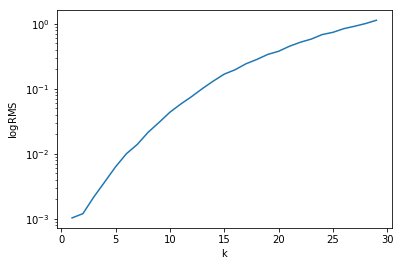

In [124]:
expplot(1,1000,1000)

Вывод

Почти все аналогично предыдущему случаю, кроме того, что в этот раз, чем больше $k$, тем больше погрешность.